In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

In [2]:
industry = pd.read_excel("cbp18cd.xlsx")

In [3]:
ca = industry[industry["State"] == "California"]

In [4]:
ny = industry[industry["State"] == "New York"]

In [5]:
fl = industry[industry["State"] == "Florida"]

In [6]:
ca_info = ca.groupby("NAICS Description", axis=0)["Annual Payroll ($1,000)"].sum()

In [7]:
ny_info = ny.groupby("NAICS Description", axis=0)["Annual Payroll ($1,000)"].sum()

In [8]:
fl_info = fl.groupby("NAICS Description", axis=0)["Annual Payroll ($1,000)"].sum()

In [9]:
all_info = pd.concat([ca_info, ny_info, fl_info], axis=1, join='outer')
all_info.columns = ["CA","NY","FL"]

In [10]:
all_info = all_info.sort_values(by = "CA", ascending = False)


In [11]:
all_info.loc["Others"] = [0,0,0]
ca_drop = []
ny_drop = []
fl_drop = []
for j in range(3):
    for i in range(1,len(all_info)-1):
        if all_info.iloc[i,j] < all_info.iloc[0,j] * 0.044:
            all_info.iloc[-1,j] += all_info.iloc[i,j]
            if j == 0:
                ca_drop.append(all_info.index.values[i])
            elif j == 1:
                ny_drop.append(all_info.index.values[i])
            else:
                fl_drop.append(all_info.index.values[i])



In [12]:
all_info

CA           NY  \
NAICS Description                                                         
Total for all sectors                          970573420.0  548702962.0   
Professional, scientific, and technical        131518147.0   64273037.0   
Health care and social assistance              126174336.0   85344561.0   
Information                                    115740299.0   36508465.0   
Manufacturing                                   83356195.0   24528574.0   
Finance and insurance                           74853000.0  112211125.0   
Wholesale trade                                 71647721.0   25816711.0   
Retail trade                                    56746261.0   28519947.0   
Construction                                    55396137.0   27320961.0   
Management of companies and enterprises         53910206.0   26428770.0   
Accommodation and food services                 42102353.0   21644808.0   
Administrative and support and waste            39499031.0   21583050.0   
Transportation and warehousing                  31360677.0   13192105.0   
Other services (except public administration)   21399769.0   15817503.0   
Real estate and rental and leasing              19630922.0   12194539.0   
Arts, entertainment, and recreation             18571492.0    9327956.0   
Educational services                            18550871.0   18886300.0   
Utilities                                        7367738.0    4708171.0   
Mining, quarrying, and oil and gas extraction    1376353.0     232305.0   
Agriculture, forestry, fishing and hunting       1242204.0     118748.0   
Industries not classified                          78498.0      34029.0   
Others                                         201179908.0  117739514.0   

                                                        FL  
NAICS Description                                           
Total for all sectors                          334385701.0  
Professional, scientific, and technical         36846429.0  
Health care and social assistance               58436799.0  
Information                                     13671532.0  
Manufacturing                                   18241707.0  
Finance and insurance                           29384764.0  
Wholesale trade                                 19699660.0  
Retail trade                                    31095811.0  
Construction                                    22473299.0  
Management of companies and enterprises         13906185.0  
Accommodation and food services                 20631772.0  
Administrative and support and waste            19452726.0  
Transportation and warehousing                  14328370.0  
Other services (except public administration)   10059454.0  
Real estate and rental and leasing               8781744.0  
Arts, entertainment, and recreation              7198065.0  
Educational services                             6711886.0  
Utilities                                        2892851.0  
Mining, quarrying, and oil and gas extraction     266078.0  
Agriculture, forestry, fishing and hunting        282404.0  
Industries not classified                          23155.0  
Others                                          78121724.0

In [13]:
ca_sorted = all_info["CA"].sort_values(ascending = False)[1:].drop(ca_drop)
ca_others = ca_sorted[0]
ca_sorted = ca_sorted[1:]
ca_sorted["Others"] = ca_others

In [14]:
ny_sorted = all_info["NY"].sort_values(ascending = False)[1:].drop(ny_drop)
ny_others = ny_sorted[0]
ny_sorted = ny_sorted[1:]
ny_sorted["Others"] = ny_others

In [15]:
fl_sorted = all_info["FL"].sort_values(ascending = False)[1:].drop(fl_drop)
fl_others = fl_sorted[0]
fl_sorted = fl_sorted[1:]
fl_sorted["Others"] = fl_others

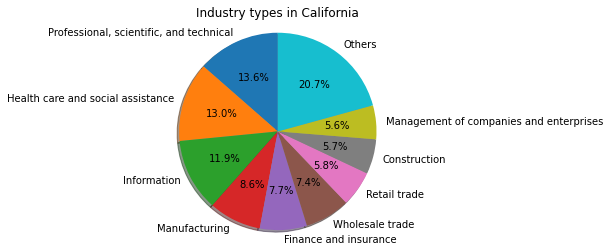

In [16]:
labels = ca_sorted.index.values
fig1, ax1 = plt.subplots()
ax1.pie(ca_sorted, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Industry types in California")
plt.show()

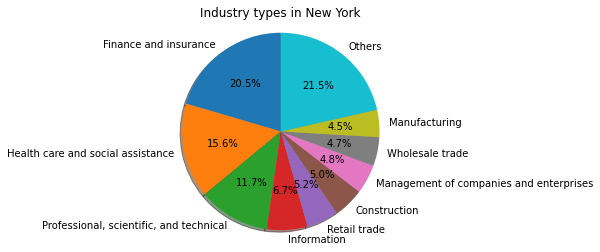

In [17]:
labels = ny_sorted.index.values
fig1, ax1 = plt.subplots()
ax1.pie(ny_sorted, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Industry types in New York")
plt.show()

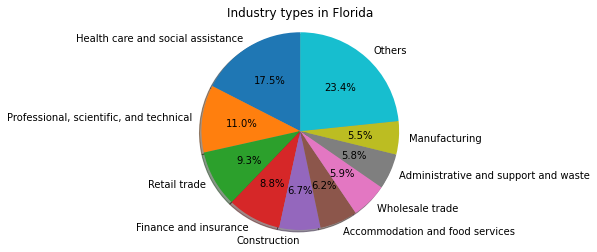

In [18]:
labels = fl_sorted.index.values
fig1, ax1 = plt.subplots()
ax1.pie(fl_sorted, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Industry types in Florida")

plt.show()

In [20]:
# only keep data of 50 states and District of Columbia
industry = industry[:9083] 

In [22]:
info = industry.groupby(["State","NAICS Description"])["Annual Payroll ($1,000)"].sum().sort_values(ascending = False).reset_index()

In [23]:
info = info[info["NAICS Description"] != "Total for all sectors"]

In [24]:
info.groupby(["State","NAICS Description"])["Annual Payroll ($1,000)"].sum()

State    NAICS Description                         
Alabama  Accommodation and food services               3001631.0
         Administrative and support and waste          3249259.0
         Agriculture, forestry, fishing and hunting     262770.0
         Arts, entertainment, and recreation            364805.0
         Construction                                  4599743.0
                                                         ...    
Wyoming  Real estate and rental and leasing             243443.0
         Retail trade                                   898857.0
         Transportation and warehousing                 514833.0
         Utilities                                      246357.0
         Wholesale trade                                454533.0
Name: Annual Payroll ($1,000), Length: 1018, dtype: float64

In [25]:
info = industry.groupby(["State","NAICS Description"]).agg({"Annual Payroll ($1,000)":sum})

In [26]:
info

Annual Payroll ($1,000)
State   NAICS Description                                                  
Alabama Accommodation and food services                           3001631.0
        Administrative and support and waste                      3249259.0
        Agriculture, forestry, fishing and hunting                 262770.0
        Arts, entertainment, and recreation                        364805.0
        Construction                                              4599743.0
...                                                                     ...
Wyoming Retail trade                                               898857.0
        Total for all sectors                                     9982639.0
        Transportation and warehousing                             514833.0
        Utilities                                                  246357.0
        Wholesale trade                                            454533.0

[1069 rows x 1 columns]

In [27]:
info.to_csv('./Industry.csv')